In [1]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from pyuoi.linear_model import UoI_Lasso

In [2]:
import numpy as np

In [6]:
import matplotlib.pyplot as plt

In [3]:
import os
import h5py

In [3]:
import sys
sys.path.append('..')

In [4]:
from utils import gen_beta2

In [6]:
import matplotlib.pyplot as plt

In [12]:
beta1 = gen_beta2(betawidth = -5)
beta2 = gen_beta2(betawidth = -5)

In [15]:
from utils import estimation_error

In [7]:
f1 = h5py.File('dataset1.h5', 'r')

In [9]:
uoil = UoI_Lasso(normalize = True, n_boots_sel = 48, n_boots_est = 48, estimation_score = 'r2', stability_selection = 1)

In [12]:
uoil.fit(f1['X'][:], f1['y'][:].ravel())

UoI_Lasso(comm=None, copy_X=True, eps=0.001, estimation_frac=0.9,
     estimation_score='r2', fit_intercept=True, max_iter=None,
     n_boots_est=48, n_boots_sel=48, n_lambdas=48, normalize=True,
     random_state=<module 'numpy.random' from 'C:\\Users\\Ankit\\Miniconda3\\envs\\nse\\lib\\site-packages\\numpy\\random\\__init__.py'>,
     selection_frac=0.9, stability_selection=1, warm_start=None)

In [13]:
f2 = h5py.File('dataset2.h5', 'r')

In [14]:
uoil2 = UoI_Lasso(normalize = True, n_boots_sel = 48, n_boots_est = 48, estimation_score = 'r2', stability_selection = 1)
uoil2.fit(f2['X'][:], f2['y'][:].ravel())

UoI_Lasso(comm=None, copy_X=True, eps=0.001, estimation_frac=0.9,
     estimation_score='r2', fit_intercept=True, max_iter=None,
     n_boots_est=48, n_boots_sel=48, n_lambdas=48, normalize=True,
     random_state=<module 'numpy.random' from 'C:\\Users\\Ankit\\Miniconda3\\envs\\nse\\lib\\site-packages\\numpy\\random\\__init__.py'>,
     selection_frac=0.9, stability_selection=1, warm_start=None)

In [4]:
f4 = h5py.File('dataset4.h5', 'r')
uoil4 = UoI_Lasso(normalize = True, n_boots_sel = 48, n_boots_est = 48, estimation_score = 'r2', stability_selection = 1)
uoil4.fit(f4['X'][:], f4['y'][:].ravel())

UoI_Lasso(comm=None, copy_X=True, eps=0.001, estimation_frac=0.9,
     estimation_score='r2', fit_intercept=True, max_iter=None,
     n_boots_est=48, n_boots_sel=48, n_lambdas=48, normalize=True,
     random_state=<module 'numpy.random' from 'C:\\Users\\Ankit\\Miniconda3\\envs\\nse\\lib\\site-packages\\numpy\\random\\__init__.py'>,
     selection_frac=0.9, stability_selection=1, warm_start=None)

(-100, 100)

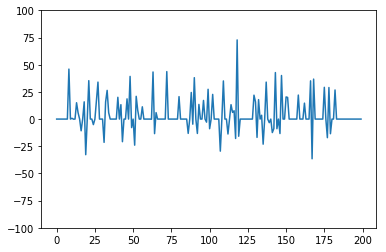

In [7]:
plt.plot(uoil4.coef_)
plt.ylim([-100, 100])

In [10]:
f4 = h5py.File('dataset4.h5', 'r')
uoil4_2 = UoI_Lasso(normalize = True, n_boots_sel = 48, n_boots_est = 48, estimation_score = 'r2', stability_selection = 0.5, random_state = 1234)
uoil4_2.fit(f4['X'][:], f4['y'][:].ravel())

UoI_Lasso(comm=None, copy_X=True, eps=0.001, estimation_frac=0.9,
     estimation_score='r2', fit_intercept=True, max_iter=None,
     n_boots_est=48, n_boots_sel=48, n_lambdas=48, normalize=True,
     random_state=<mtrand.RandomState object at 0x000001D38A3249D8>,
     selection_frac=0.9, stability_selection=0.5, warm_start=None)

In [28]:
uoil4_2.coef_

array([  0.        ,   0.        ,   0.        ,   0.        ,
         6.36214633,   0.        ,   0.        ,   8.17335269,
        36.51341328,   0.        ,   5.06634309,   0.        ,
         0.        ,   0.        ,   4.67901667,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,  23.49982408,   0.        ,   0.        ,
         0.        ,   0.        ,  28.90644159,   7.06015364,
         0.        ,   0.        ,   0.        ,   0.        ,
         5.27898592,  14.24704501,  19.30621289,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
        28.97044416,   0.        ,   0.56306042,   0.        ,
         0.        ,   0.        ,  24.90479139,   0.        ,
        46.29202008,   0.        ,   0.        ,   0.        ,
         0.        ,   8.26630752,   0.        ,  10.52887985,
         0.13778777,   0.        ,   0.        ,   0.        ,
         0.        , -12.14003455,   0.        ,  40.77

In [12]:
np.count_nonzero(uoil4_2.coef_)

61

In [17]:
list(f4.keys())

['X', 'X_test', 'beta', 'sigma', 'y', 'y_test']

In [19]:
ee4 = estimation_error(f4['beta'][:].ravel(), uoil4.coef_.ravel())

In [20]:
ee4

(array([2.83784669]), array([16.06954961]))

In [22]:
ee4_2 = estimation_error(f4['beta'][:].ravel(), uoil4_2.coef_.ravel())

In [23]:
ee4_2

(array([3.48727431]), array([14.83039318]))

In [25]:
f4 = h5py.File('dataset4.h5', 'r')
en = ElasticNetCV(cv = 5, normalize = True)
en.fit(f4['X'][:], f4['y'][:].ravel())

ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
       normalize=True, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [26]:
ee_en = estimation_error(f4['beta'][:].ravel(), en.coef_.ravel())

In [27]:
ee_en

(array([0.27397435]), array([2.65966236]))